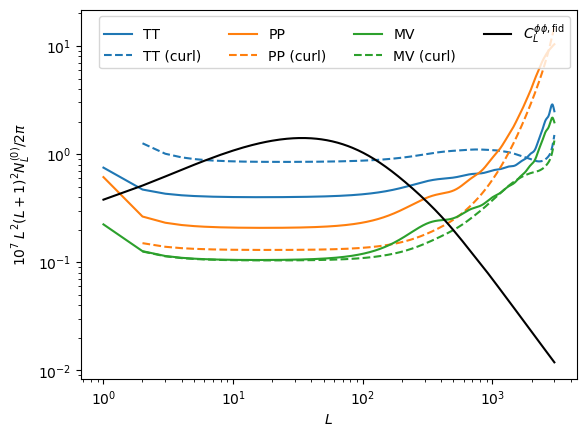

In [1]:
import os, numpy as np
from plancklens import utils, n0s
import plancklens

# gets N0 and plot them
import pylab as pl

cls_path = os.path.join(os.path.dirname(os.path.abspath(plancklens.__file__)), 'data', 'cls')
cls_unl = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lenspotentialCls.dat'))
wls = lambda L : L ** 2 * (L  + 1) ** 2 * 1e7 / (2 * np.pi)
ls = np.arange(1, 3001)
ls_curl = np.arange(2, 3001)

N0s, N0_curls = n0s.get_N0() # Check this out for options
for qe_key in N0s.keys():
    label = {'tt':'TT', '_p':'PP', '':'MV'}[qe_key[1:]]
    ln = pl.loglog(ls, wls(ls) * N0s[qe_key][ls], label=label)
    pl.loglog(ls_curl, wls(ls_curl) * N0_curls[qe_key][ls_curl], label=label + ' (curl)', ls='--', c=ln[0].get_color())
pl.plot(ls, wls(ls) * cls_unl['pp'][ls], c='k', label=r'$C_L^{\phi\phi, \rm fid}$')
pl.xlabel(r'$L$')
pl.ylabel(r'$10^7 \: L^2(L + 1)^2 N_L^{(0)} / 2 \pi$')
pl.legend(ncol=4)
pl.show()

In [2]:
cls_unl = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lenspotentialCls.dat'))
N0_iter = n0s.get_N0_iter("p", 1, 1*np.sqrt(2), 3, cls_unl, 30, {'t':3000,'e':5000,'b':5000,}, lmax_qlm=7000, itermax=3, ret_delcls=False, ret_curl=True)


Seeing lmax's:
t: 3000
e: 5000
b: 5000
 [00:01:54]  -------> 75%


In [3]:
print(np.shape(N0_iter))

(4, 4, 7001)


In [4]:
print(np.shape(cls_unl['tt']))

(7001,)


In [5]:
np.size(N0_iter[0][0])

7001

In [6]:
wls = lambda L : L**2*(L) **2 *0.25

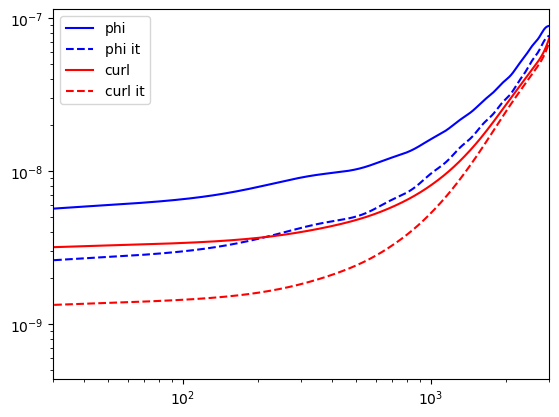

In [7]:
Ls = np.arange(3000)
pl.loglog(Ls, wls(Ls) * N0_iter[0][0][Ls], color = "blue", label="phi")
pl.loglog(Ls, wls(Ls) * N0_iter[0][3][Ls], color = "blue", label="phi it", linestyle="--")
pl.loglog(Ls, wls(Ls) * N0_iter[2][0][Ls], color = "red", label="curl")
pl.loglog(Ls, wls(Ls) * N0_iter[2][3][Ls], color = "red", label="curl it", linestyle="--")
pl.xlim(30,3000)
pl.legend()

In [8]:
print(N0_iter[2][0][30]*wls(30))

3.180622931561806e-09


In [10]:
import pandas as pd

In [11]:
N_dict = {}
N = np.array(pd.read_csv('../kkomega/data/N0/S4_base/'+f'N.csv', sep=' ')['T'])*(2.7255*1e6)**2
N_dict['tt'] = np.concatenate((np.array([N[0],N[0]]),N))
N = np.array(pd.read_csv('../kkomega/data/N0/S4_base/'+f'N.csv', sep=' ')['E'])*(2.7255*1e6)**2
N_dict['ee'] = np.concatenate((np.array([N[0],N[0]]),N))
N = np.array(pd.read_csv('../kkomega/data/N0/S4_base/'+f'N.csv', sep=' ')['B'])*(2.7255*1e6)**2
N_dict['bb'] = np.concatenate((np.array([N[0],N[0]]),N))

In [12]:
Ls = np.arange(np.size(N_dict['tt']))
arcmin_to_rad = np.pi/180/60
beam = 3 * arcmin_to_rad
deltaT = np.sqrt(N_dict['tt']/arcmin_to_rad/arcmin_to_rad)
deltaP = np.sqrt(N_dict['ee']/arcmin_to_rad/arcmin_to_rad)
print(deltaT[4000])

9.311036575631533


In [13]:
print(np.size(Ls))

5001


In [20]:
cls_unl = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lenspotentialCls.dat'))
N0_iter = n0s.get_N0_iter("p", deltaT, deltaP, 0, cls_unl, {'t': 30, 'e': 30, 'b': 30}, {'t':3000,'e':5000,'b':5000}, lmax_qlm=7000, itermax=3, ret_delcls=False, ret_curl=True)


Seeing lmax's:
t: 3000
e: 5000
b: 5000
 [00:01:58]  -------> 75%


In [21]:
print(np.shape(cls_unl['tt']))

(7001,)


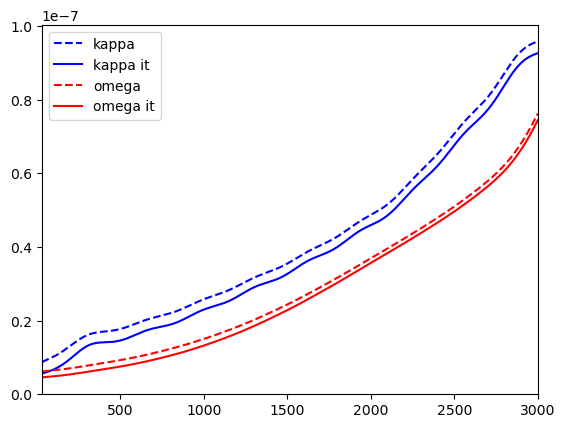

In [22]:
Ls = np.arange(30,3000)
pl.plot(Ls, wls(Ls) * N0_iter[0][0][Ls], color = "blue", label="kappa", linestyle="--")
pl.plot(Ls, wls(Ls) * N0_iter[0][3][Ls], color = "blue", label="kappa it")
pl.plot(Ls, wls(Ls) * N0_iter[2][0][Ls], color = "red", label="omega", linestyle="--")
pl.plot(Ls, wls(Ls) * N0_iter[2][3][Ls], color = "red", label="omega it")
pl.xlim(30, 3000)
# pl.ylim(4e-9,1e-8)
pl.legend()

In [17]:
print(N0_iter[2][0][30]*wls(30))

6.081945401741004e-09


In [18]:
N0 = n0s.get_N0(3, 1, 1*np.sqrt(2), 3000, 30)

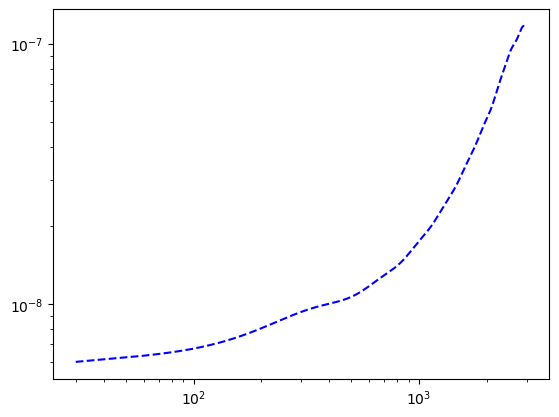

In [19]:
Ls = np.arange(np.size(N0[0]['p']))
pl.loglog(Ls[30:],  wls(Ls[30:]) * N0[0]['p'][30:], color = "blue", label="kappa", linestyle="--")